<a href="https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/Excercises/2_6factor_more_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# More analysis of the six-Factor Full Factorial Design

## Introduction
Let us continue where we eneded in 2$^6$ full factorial design.

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
from numpy.random import rand, seed
import seaborn as sns
import scipy.stats as stats
from matplotlib.pyplot import *

seed(10)

## Two-Level Six-Factor Full Factorial Design
First, let's recover the data.

In [ ]:
import itertools

# Create the inputs:
encoded_inputs = list( itertools.product([-1,1],[-1,1],[-1,1],[-1,1],[-1,1],[-1,1]) )

# Create the experiment design table:
doe=pd.DataFrame(encoded_inputs)
doe=doe[doe.columns[::-1]]
doe.columns=['x%d'%(i+1) for i in range(6)]
doe

doe['y1'] = [3.4, 9.7, 7.4, 10.6, 6.5, 7.9, 10.3, 9.5, 14.3, 10.5, 7.8, 17.2, 9.4, 12.1, 9.5, 15.8, 8.3, 8.0, 7.9, 10.7, 7.2, 7.2, 7.9, 10.2, 10.3, 9.9, 7.4, 10.5, 9.6, 15.1, 8.7, 12.1, 12.6, 10.5, 11.3, 10.6, 8.1, 12.5, 11.1, 12.9, 14.6, 12.7, 10.8, 17.1, 13.6, 14.6, 13.3, 14.4, 11.0, 12.5, 8.9, 13.1, 7.6, 8.6, 11.8, 12.4, 13.4, 14.6, 14.9, 11.8, 15.6, 12.8, 13.5, 15.8]
doe['y2'] = [15,5,23, 8,20, 9, 13, 5, 23, 1, 11, 5, 15, 8, 15, 1, 22, 8, 16, 7, 25, 5, 17, 8, 10, 3, 22, 6, 24, 4, 10, 5, 32, 10, 28, 18, 22, 31, 17, 16, 38, 12, 34, 19, 12, 14, 25, 16, 31, 14, 23, 23, 28, 20, 18, 11, 39, 30, 31, 6, 33, 23, 31, 11]
doe['y3'] = [36, 35, 37, 34, 30, 32, 28, 38, 40, 32, 32, 28, 34, 26,  30, 28, 40, 30, 35, 35, 32, 35, 36, 32, 20, 35, 35, 28, 27, 36, 36, 35, 32, 34, 30, 24, 30, 20, 32, 25, 20, 20, 22, 35, 26, 15, 19, 24, 22, 23, 22, 18, 20, 20, 20, 36, 20, 11, 20, 35, 16, 32, 20, 20]
print(doe[['y1','y2','y3']])

# Defining Variables and Variable Labels

labels = {}
labels[1] = ['x1','x2','x3','x4','x5','x6']
for i in [2,3,4,5,6]:
    labels[i] = list(itertools.combinations(labels[1], i))

obs_list = ['y1','y2','y3']

for k in labels.keys():
    print(str(k) + " : " + str(labels[k]))

      y1  y2  y3
0    3.4  15  36
1    9.7   5  35
2    7.4  23  37
3   10.6   8  34
4    6.5  20  30
..   ...  ..  ..
59  11.8   6  35
60  15.6  33  16
61  12.8  23  32
62  13.5  31  20
63  15.8  11  20

[64 rows x 3 columns]
1 : ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
2 : [('x1', 'x2'), ('x1', 'x3'), ('x1', 'x4'), ('x1', 'x5'), ('x1', 'x6'), ('x2', 'x3'), ('x2', 'x4'), ('x2', 'x5'), ('x2', 'x6'), ('x3', 'x4'), ('x3', 'x5'), ('x3', 'x6'), ('x4', 'x5'), ('x4', 'x6'), ('x5', 'x6')]
3 : [('x1', 'x2', 'x3'), ('x1', 'x2', 'x4'), ('x1', 'x2', 'x5'), ('x1', 'x2', 'x6'), ('x1', 'x3', 'x4'), ('x1', 'x3', 'x5'), ('x1', 'x3', 'x6'), ('x1', 'x4', 'x5'), ('x1', 'x4', 'x6'), ('x1', 'x5', 'x6'), ('x2', 'x3', 'x4'), ('x2', 'x3', 'x5'), ('x2', 'x3', 'x6'), ('x2', 'x4', 'x5'), ('x2', 'x4', 'x6'), ('x2', 'x5', 'x6'), ('x3', 'x4', 'x5'), ('x3', 'x4', 'x6'), ('x3', 'x5', 'x6'), ('x4', 'x5', 'x6')]
4 : [('x1', 'x2', 'x3', 'x4'), ('x1', 'x2', 'x3', 'x5'), ('x1', 'x2', 'x3', 'x6'), ('x1', 'x2', 'x4', 'x5'), ('x

## Utilizing Degrees of Freedom
Our very expensive, 64-experiment full factorial design (the data for which maps  (x$_1$,x$_2$,…,x$_6$) to (y$_1$,y$_2$,y$_3$) gives us 64 data points, and 64 degrees of freedom. What we do with those 64 degrees of freedom is up to us.

We could fit an empirical model, or response surface, that has 64 independent parameters, and account for many of the high-order interaction terms - all the way up to six-variable interaction effects. However, high-order effects are rarely important, and are a waste of our degrees of freedom.

Alternatively, we can fit an empirical model with fewer coefficients, using up fewer degrees of freedom, and use the remaining degrees of freedom to characterize the error introduced by our approximate model.

To describe a model with the 3 variables listed above and no other variable interaction effects would use only 3 degrees of freedom, plus 1 degree of freedom for the constant term, leaving 60 degrees of freedom available to quantify error, attribute variance, etc.

Our goal is to use least squares to compute model equations for  (y$_1$,y$_2$,y$_3$)
  as functions of  (x$_1$,x$_4$,x$_6$)
 .

In [ ]:
xlabs = ['x1','x4','x6']
ylabs = ['y1','y2','y3']
ls_data = doe[xlabs+ylabs]

In [ ]:
import statsmodels.api as sm
import numpy as np

x = ls_data[xlabs]
x = sm.add_constant(x)

The first ordinary least squares linear model is created to predict values of the first variable,  y$_1$, as a function of each of our input variables, the list of which are contained in the xlabs variable. When we perform the linear regression fitting, we see much of the same information that we found in the prior two-level three-factor full factorial design, but here, everything is done automatically.

The model is linear, meaning it's fitting the coefficients of the function:
\begin{equation}
\hat{y}=a_0+a_1x_1+a_2x_2+a_3x_3 + \epsilon
\end{equation}
(here, the variables y and x are vectors, with one component for each response; in our case, they are three-dimensional vectors.)

Because there are 64 observations and 4 coefficients, the 60 extra observations give us extra degrees of freedom with which to assess how good the model is. That analysis can be done with an ordinary least squares (OLS) model, available through the statsmodel library in Python.

## Ordinary Least Squares Regression Model
This built-in OLS model will fit an input vector  (x$_1$,x$_2$,x$_3$)
  to an output vector  (y$_1$,y$_2$,y$_3$)
  using a linear model; the OLS model is designed to fit the model with more observations than coefficients, and utilize the remaining data to quantify the fit of the model.

Let's run through one of these, and analyze the results:

In [ ]:
y1 = ls_data['y1']
est1 = sm.OLS(y1,x).fit()
print(est1.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     28.25
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           1.63e-11
Time:                        07:07:12   Log-Likelihood:                -129.95
No. Observations:                  64   AIC:                             267.9
Df Residuals:                      60   BIC:                             276.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1234      0.238     46.741      0.0

The StatsModel OLS object prints out quite a bit of useful information, in a nicely-formatted table. Starting at the top, we see a couple of important pieces of information: specifically, the name of the dependent variable (the response) that we're looking at, the number of observations, and the number of degrees of freedom.

We can see an  R$^2$ statistic, which indicates how well this data is fit with our linear model, and an adjusted R$^2$
  statistic, which accounts for the large nubmer of degrees of freedom. While an adjusted R$^2$
  of 0.585 is not great, we have to remember that this linear model is trying to capture a wealth of complexity in six coefficients. Furthermore, the adjusted  R$^2$
  value is too broad to sum up how good our model actually is.

The table in the middle is where the most useful information is located. The coef column shows the coefficients  a$_0$,a$_1$,a$_2$,…
  for the model equation:
\begin{equation}
\hat{y}=a_0+a_1x_1+a_2x_2+a_3x_3 + \epsilon
\end{equation}

Using the extra degrees of freedom, an estime s$^2$
  of the variance in the regression coefficients is also computed, and reported in the the std err column. Each linear term is attributed the same amount of variance,  ±0.24
 .

In [ ]:
y2 = ls_data['y2']
est2 = sm.OLS(y2,x).fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     37.20
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           1.04e-13
Time:                        07:07:12   Log-Likelihood:                -202.63
No. Observations:                  64   AIC:                             413.3
Df Residuals:                      60   BIC:                             421.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.9531      0.741     22.885      0.0

In [ ]:
y3 = ls_data['y3']
est3 = sm.OLS(y3,x).fit()
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:                     y3   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     16.13
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           8.44e-08
Time:                        07:07:12   Log-Likelihood:                -196.58
No. Observations:                  64   AIC:                             401.2
Df Residuals:                      60   BIC:                             409.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.2812      0.674     41.960      0.0

## Quantifying Model Goodness-of-Fit
We can now use these linear models to evaluate each set of inputs and compare the model response  $\hat{y}$ to the actual observed response y. What we would expect to see, if our model does an adequate job of representing the underlying behavior of the model, is that in each of the 64 experiments, the difference between the model prediction M and the measured data d, defined as the residual r, r=|d−M|, should be comparable across all experiments. If the residuals appear to have functional dependence on the input variables, it is an indication that our model is missing important effects and needs more or different terms. The way we determine this, mathematically, is by looking at a quantile-quantile plot of our errors (that is, a ranked plot of our error magnitudes).

If the residuals are normally distributed, they will follow a straight line; if the plot shows the data have significant wiggle and do not follow a line, it is an indication that the errors are not normally distributed, and are therefore skewed (indicating terms missing from our OLS model).

Text(0.5, 1.0, 'Residuals, y3')

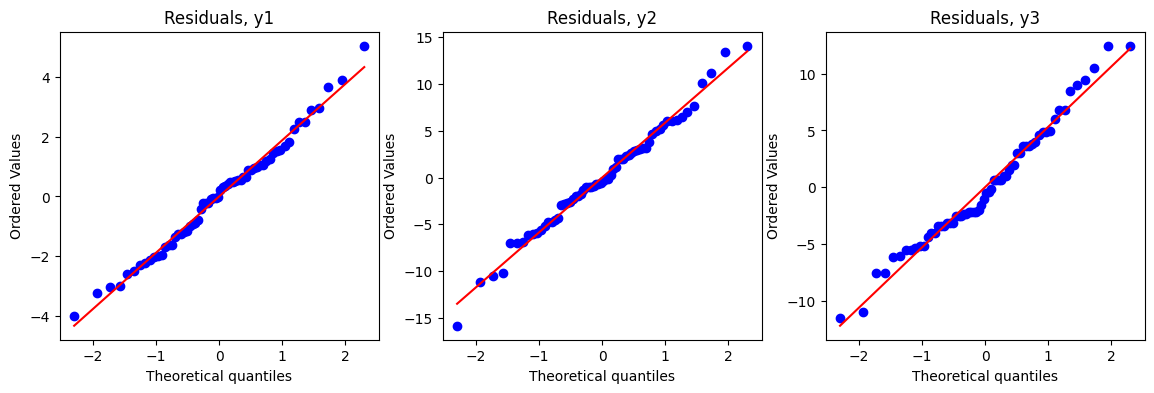

In [ ]:
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from matplotlib.pyplot import *

# Quantify goodness of fit

fig = figure(figsize=(14,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

r1 = y1 - est1.predict(x)
r2 = y2 - est2.predict(x)
r3 = y3 - est3.predict(x)

stats.probplot(r1, dist="norm", plot=ax1)
ax1.set_title('Residuals, y1')

stats.probplot(r2, dist="norm", plot=ax2)
ax2.set_title('Residuals, y2')

stats.probplot(r3, dist="norm", plot=ax3)
ax3.set_title('Residuals, y3')

Determining whether significant trends are being missed by the model depends on how many points deviate from the red line, and how significantly. If there is a single point that deviates, it does not necessarily indicate a problem; but if there is significant wiggle and most points deviate significantly from the red line, it means that there is something about the relationship between the inputs and the outputs that our model is missing.

There are only a few points deviating from the red line. We saw from the effect quantile for y$_3$
  that there was an interaction variable that was important to modeling the response  y$_3$
 , and it is likely this interaction that is leading to noise at the tail end of these residuals. This indicates residual errors (deviations of the model from data) that do not follow a natural, normal distribution, which indicates there is a pattern in the deviations - namely, the interaction effect.

The conclusion about the error from the quantile plots above is that there are only a few points deviation from the line, and no particularly significant outliers. Our model can use some improvement, but it's a pretty good first-pass model.

## Distribution of Error
Another thing we can look at is the normalized error: what are the residual errors (differences between our model prediction and our data)? How are their values distributed?

A kernel density estimate (KDE) plot, which is a smoothed histogram, shows the probability distribution of the normalized residual errors. As expected, they're bunched pretty close to zero. There are some bumps far from zero, corresponding to the outliers on the quantile-quantile plot of the errors above. However, they're pretty close to randomly distributed, and therefore it doesn't look like there is any systemic bias there.

Text(0.5, 1.0, 'Normalized Residual Error, y3')

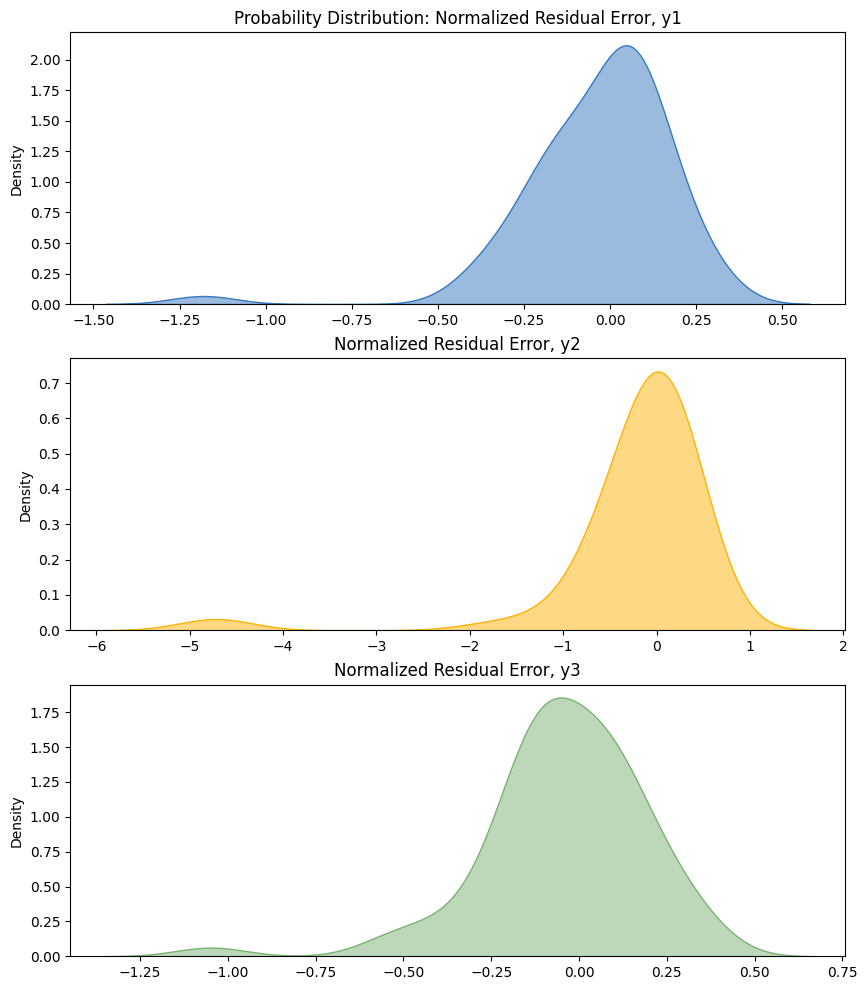

In [ ]:
import warnings
warnings.filterwarnings("ignore")

fig = figure(figsize=(10,12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
axes = [ax1,ax2,ax3]

colors = sns.xkcd_palette(["windows blue", "amber", "faded green", "dusty purple","aqua blue"])

#resids = [r1, r2, r3]
normed_resids = [r1/y1, r2/y2, r3/y3]

for (dataa, axx, colorr) in zip(normed_resids,axes,colors):
    sns.kdeplot(dataa, ax=axx, color=colorr, shade=True, alpha=0.5);

ax1.set_title('Probability Distribution: Normalized Residual Error, y1')
ax2.set_title('Normalized Residual Error, y2')
ax3.set_title('Normalized Residual Error, y3')

Note that in these figures, the bumps at extreme value are caused by the fact that the interval containing the responses includes 0 and values close to 0, so the normalization factor is very tiny, leading to large values.

## Analysis of Variance

In [ ]:
xlabs = ['x1','x4', 'x6']

doe.groupby(xlabs)[ylabs].mean()

y1      y2      y3
x1 x4 x6                         
-1 -1 -1   7.3625  18.875  34.250
       1  10.3000  24.875  26.000
    1 -1   9.6250  16.250  31.750
       1  13.7125  30.375  20.375
 1 -1 -1   9.2250   6.875  33.875
       1  11.6375  17.875  25.000
    1 -1  12.9000   4.125  31.000
       1  14.2250  16.375  24.000

In [ ]:
doe.groupby(xlabs)[ylabs].var()

y1         y2         y3
x1 x4 x6                                
-1 -1 -1  3.794107  18.125000  15.642857
       1  3.394286  32.696429  29.714286
    1 -1  4.502143  35.357143  37.928571
       1  2.081250  74.267857   7.982143
 1 -1 -1  1.810714   2.696429   6.125000
       1  2.485536  47.267857  43.714286
    1 -1  7.648571   5.839286  15.714286
       1  3.042143  56.839286  84.000000

## Distributions of Variance, plotting mean-to-variance ratio

This ratio ($\mu/\sigma^2$$) is related to the signal-to-noise ratio, or more precisely, the mean-to-variance ratio.

A **higher ratio** suggests that the mean is large relative to the variability (variance) within that group. This indicates a stronger "signal" or effect of the input variables on the response within that specific combination of x1, x4, and x6 levels. In simpler terms, the average response is much larger than the spread of the data around that average.

A **lower ratio** suggests that the mean is small relative to the variability. This indicates a weaker "signal" or that the variability is high within that group, making it harder to discern a clear effect of the input variables.

In the context of this experiment, plotting the distribution of this ratio helps visualize how consistently the mean response is observed across different combinations of the input variables, relative to the noise or random variation present in those combinations. A distribution skewed towards higher values would suggest that the chosen inputs have a relatively strong and consistent effect on the responses. Conversely, a distribution centered around zero or with a wider spread towards lower values might indicate that the effects of the chosen inputs are less clear or are more influenced by noise.

We can convert these dataframes of averages, variances, and counts into data for plotting. For example, if we want to make a histogram of every value in the groupby dataframe, we can use the .values method, so that this:
´´´
doe.gorupby(xlabs)[ylabs].mean()
´´´
becomes this:

doe.groupby(xlabs)[ylabs].mean().values


This  M×N
  array can then be flattened into a vector using the ravel() method from numpy:

np.ravel( doe.groupby(xlabs)[ylabs].mean().values )

The resulting data can be used to generate histograms, as shown below:

Grouping responses by x1-x4-x6


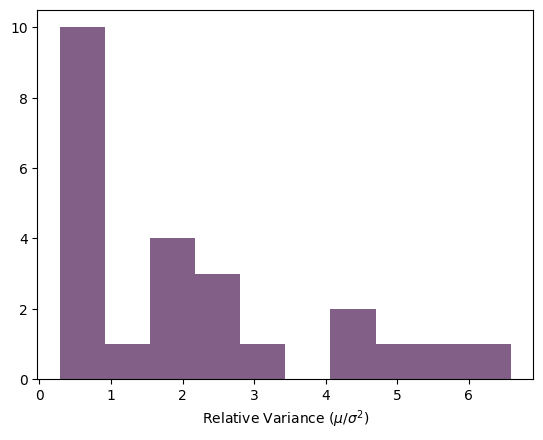

In [ ]:
# Histogram of mean-to-variance ratio of response values, grouped by xlabs

xlabs = ['x1','x4','x6']

print("Grouping responses by %s"%( "-".join(xlabs) ))

dat = np.ravel(doe.groupby(xlabs)[ylabs].mean().values) / np.ravel(doe.groupby(xlabs)[ylabs].var().values)

hist(dat, 10, color=colors[3]);
xlabel(r'Relative Variance ($\mu$/$\sigma^2$)')
show()

**Looking at the histogram of the mean-to-variance ratio:**

The shape of the distribution tells you about the overall consistency of the signal-to-noise ratio across all the different combinations of x1, x4, and x6.

- If the histogram were heavily skewed towards higher positive values, it would suggest that for most combinations of x1, x4, and x6, the average response is much larger than the variation around that average. This would imply that these inputs have a strong and consistent effect on the responses.
- If the histogram were centered around zero or had a wide spread, it would indicate that the effects of x1, x4, and x6 on the responses are less clear or are more influenced by noise. A wider spread suggests that the mean-to-variance ratio varies significantly depending on the specific combination of input levels.

In this specific plot, you can observe the distribution of these ratios. The peak around zero suggests that many combinations of x1, x4, and x6 result in a mean response that is relatively small compared to the variance. There are also some values further from zero, indicating combinations where the mean is larger relative to the variance.

This plot, along with the individual variance plots for y1, y2, and y3 (see below), helps to build a more complete picture of how well your chosen linear model with x1, x4, and x6 is capturing the effects on each response variable.

Grouping responses by x1-x4-x6


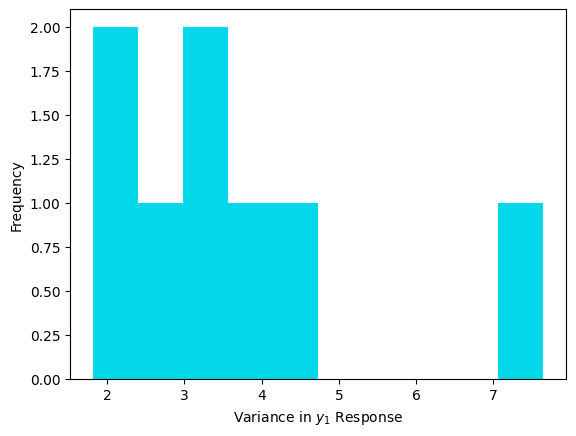

In [ ]:
# Histogram of variances of response values, grouped by xlabs

print("Grouping responses by %s"%( "-".join(xlabs) ))

dat = np.ravel(doe.groupby(xlabs)['y1'].var().values)

hist(dat, color=colors[4])
xlabel(r'Variance in $y_{1}$ Response')
ylabel(r'Frequency')
show()

**y1 Variance Plot:** This histogram shows that the variances for y1 are relatively low and clustered together. This suggests that the chosen input variables (x1, x4, and x6) do a reasonably good job of explaining the variation in y1.

Grouping responses by x1-x4-x6


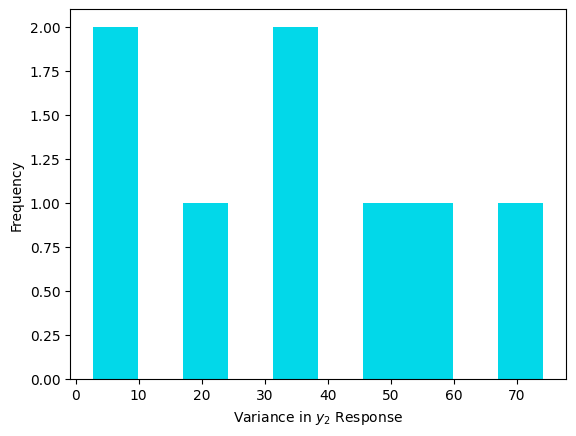

In [ ]:
# Histogram of variances of response values, grouped by xlabs

print("Grouping responses by %s"%( "-".join(xlabs) ))

dat = np.ravel(doe.groupby(xlabs)['y2'].var().values)

hist(dat, color=colors[4])
xlabel(r'Variance in $y_{2}$ Response')
ylabel(r'Frequency')
show()

**y2 Variance Plot:** This histogram shows a wider spread of variances for y2, with some higher values compared to y1. This indicates that the chosen input variables explain less of the variation in y2, and there might be other factors or interactions influencing y2 that are not included in the current model.

Grouping responses by x1-x4-x6


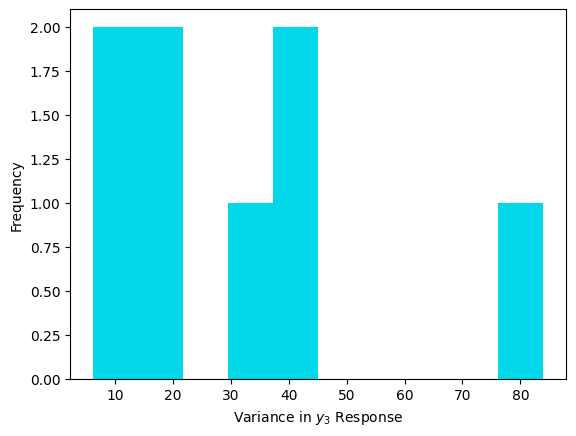

In [ ]:
# Histogram of variances of response values, grouped by xlabs

print("Grouping responses by %s"%( "-".join(xlabs) ))

dat = np.ravel(doe.groupby(xlabs)['y3'].var().values)

hist(dat, color=colors[4])
xlabel(r'Variance in $y_{3}$ Response')
ylabel(r'Frequency')
show()

**y3 Variance Plot:** This histogram shows the largest spread of variances among the three response variables, with some very high values. This strongly suggests that the current linear model with only x1, x4, and x6 is not adequately capturing the variation in y3. There are likely significant higher-order interactions or other factors affecting y3 that are not accounted for in this model. This aligns with the earlier observation from the quantile-quantile plot for y3 residuals, which showed more deviation from the normal distribution.

In summary, the variance plots visually reinforce the findings from the OLS regression summaries and residual plots. They highlight that the current model is best at explaining the variation in y1, less so for y2, and performs the poorest for y3, suggesting the need to consider additional terms or interactions for y2 and especially y3 in future modeling efforts.

## Residual vs. Response Plots
Another thing we can do, to look for uncaptured effects, is to look at our residuals vs.  $\hat{y}$. This is a further effort to look for underlying functional relationships between  $\hat{y}$
  and the residuals, which would indicate that our system exhibits behavior not captured by our linear model.

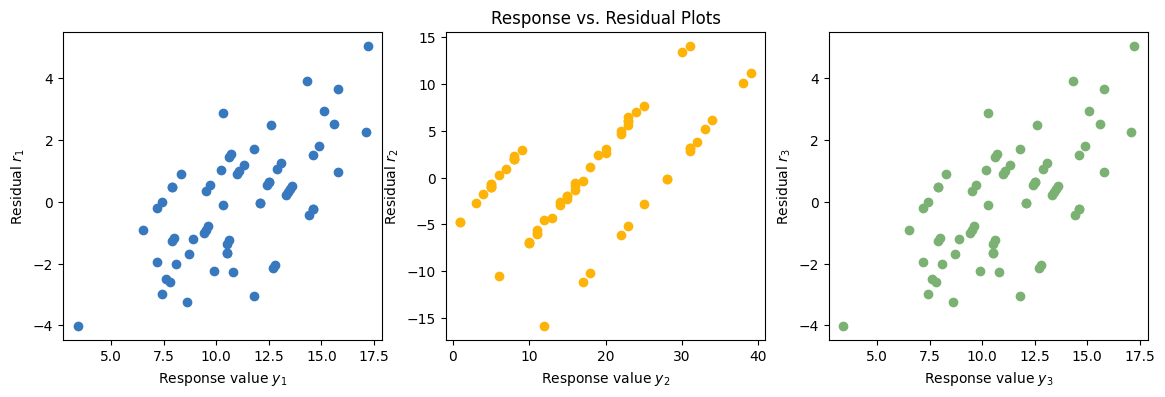

In [ ]:
# normal plot of residuals

fig = figure(figsize=(14,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.plot(y1,r1,'o',color=colors[0])
ax1.set_xlabel('Response value $y_1$')
ax1.set_ylabel('Residual $r_1$')

ax2.plot(y2,r2,'o',color=colors[1])
ax2.set_xlabel('Response value $y_2$')
ax2.set_ylabel('Residual $r_2$')
ax2.set_title('Response vs. Residual Plots')

ax3.plot(y1,r1,'o',color=colors[2])
ax3.set_xlabel('Response value $y_3$')
ax3.set_ylabel('Residual $r_3$')

show()

Notice that each plot is trending up and to the right - indicative of an underlying trend that our model  $\hat{y}$
  is not capturing. The trend is relatively weak, however, indicating that our linear model does a good job of capturing most of the relevant effects of this system.

## Lets plot the y$_{pred}$ vs y$_{real}$

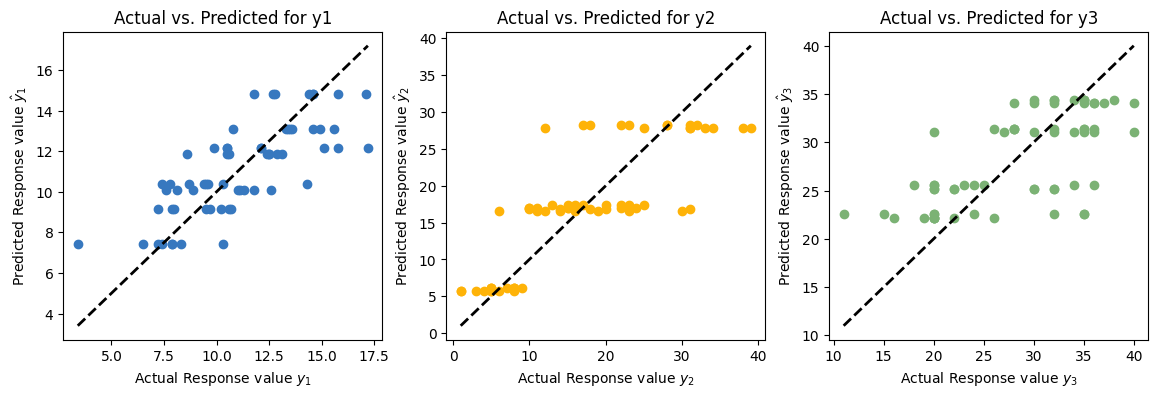

In [ ]:
fig = figure(figsize=(14,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# Plot for y1
ax1.plot(y1, est1.predict(x), 'o', color=colors[0])
ax1.set_xlabel('Actual Response value $y_1$')
ax1.set_ylabel('Predicted Response value $\hat{y}_1$')
ax1.set_title('Actual vs. Predicted for y1')
ax1.plot([y1.min(), y1.max()], [y1.min(), y1.max()], 'k--', lw=2) # Add a diagonal line for reference

# Plot for y2
ax2.plot(y2, est2.predict(x), 'o', color=colors[1])
ax2.set_xlabel('Actual Response value $y_2$')
ax2.set_ylabel('Predicted Response value $\hat{y}_2$')
ax2.set_title('Actual vs. Predicted for y2')
ax2.plot([y2.min(), y2.max()], [y2.min(), y2.max()], 'k--', lw=2) # Add a diagonal line for reference

# Plot for y3
ax3.plot(y3, est3.predict(x), 'o', color=colors[2])
ax3.set_xlabel('Actual Response value $y_3$')
ax3.set_ylabel('Predicted Response value $\hat{y}_3$')
ax3.set_title('Actual vs. Predicted for y3')
ax3.plot([y3.min(), y3.max()], [y3.min(), y3.max()], 'k--', lw=2) # Add a diagonal line for reference

show()

Based on the analysis so far, it seems the linear model with x1, x4, and x6 explains the variation in y1 better than in y2 and y3. For y2 and especially y3, there might be significant higher-order interactions or other factors not included in the current model.



## Discussion
The analysis shows that there are some higher-order or nonlinear effects in the system that a purely linear model does not account for. Next steps would involve adding higher order points for a quadratic or higher order polynomial model to gather additional data to fit the higher-degree models.